In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your merged stats/salary file (update path as needed)
df = pd.read_csv("player_team_salary_stats_2024-2025_SerieA.csv")


In [5]:
# Keep only strikers/forwards for main finishing analysis
attackers = df[df['Pos'].str.contains('FW', na=False)].copy()
# Remove players with very few shots (set your own threshold)
attackers = attackers[attackers['Shots'] >= 20].copy()


In [6]:
# Calculate conversion rate and xG per shot
attackers['Shot_Conversion'] = attackers['Goals'] / attackers['Shots']
attackers['xG_per_shot'] = attackers['Expected_xG'] / attackers['Shots']
xg_mean = attackers['xG_per_shot'].mean()
conv_mean = attackers['Shot_Conversion'].mean()


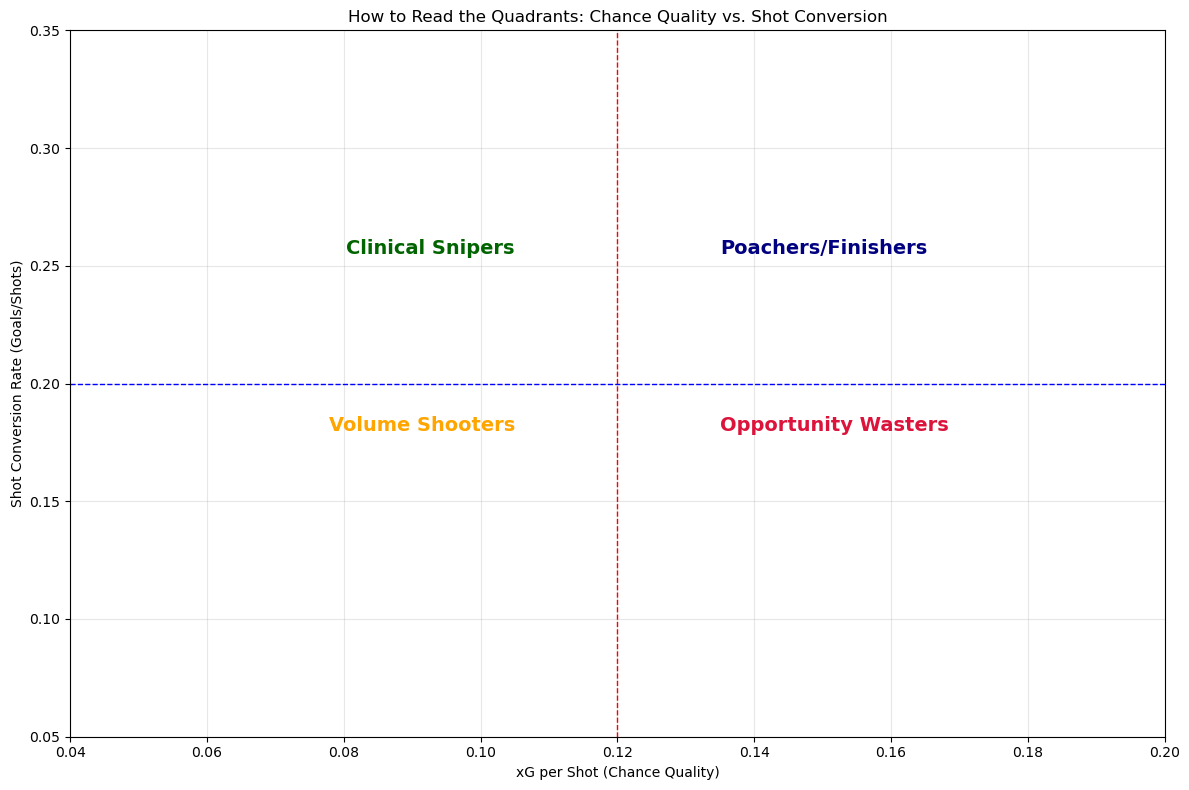

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))

# Find realistic axis limits (you can adjust if needed)
xg_min, xg_max = 0.04, 0.20
conv_min, conv_max = 0.05, 0.35

x_mean = (xg_min + xg_max) / 2
y_mean = (conv_min + conv_max) / 2

plt.xlim(xg_min, xg_max)
plt.ylim(conv_min, conv_max)

# Draw average lines
plt.axvline(x_mean, color='red', linestyle='--', linewidth=1, label='Avg xG/Shot')
plt.axhline(y_mean, color='blue', linestyle='--', linewidth=1, label='Avg Shot Conversion')

# Quadrant labels
plt.text(x_mean-0.015, y_mean+0.055, 'Clinical Snipers', color='darkgreen', fontsize=14, ha='right', fontweight='bold')
plt.text(x_mean+0.015, y_mean+0.055, 'Poachers/Finishers', color='navy', fontsize=14, ha='left', fontweight='bold')
plt.text(x_mean+0.015, y_mean-0.02, 'Opportunity Wasters', color='crimson', fontsize=14, ha='left', fontweight='bold')
plt.text(x_mean-0.015, y_mean-0.02, 'Volume Shooters', color='orange', fontsize=14, ha='right', fontweight='bold')

plt.xlabel('xG per Shot (Chance Quality)')
plt.ylabel('Shot Conversion Rate (Goals/Shots)')
plt.title('How to Read the Quadrants: Chance Quality vs. Shot Conversion')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


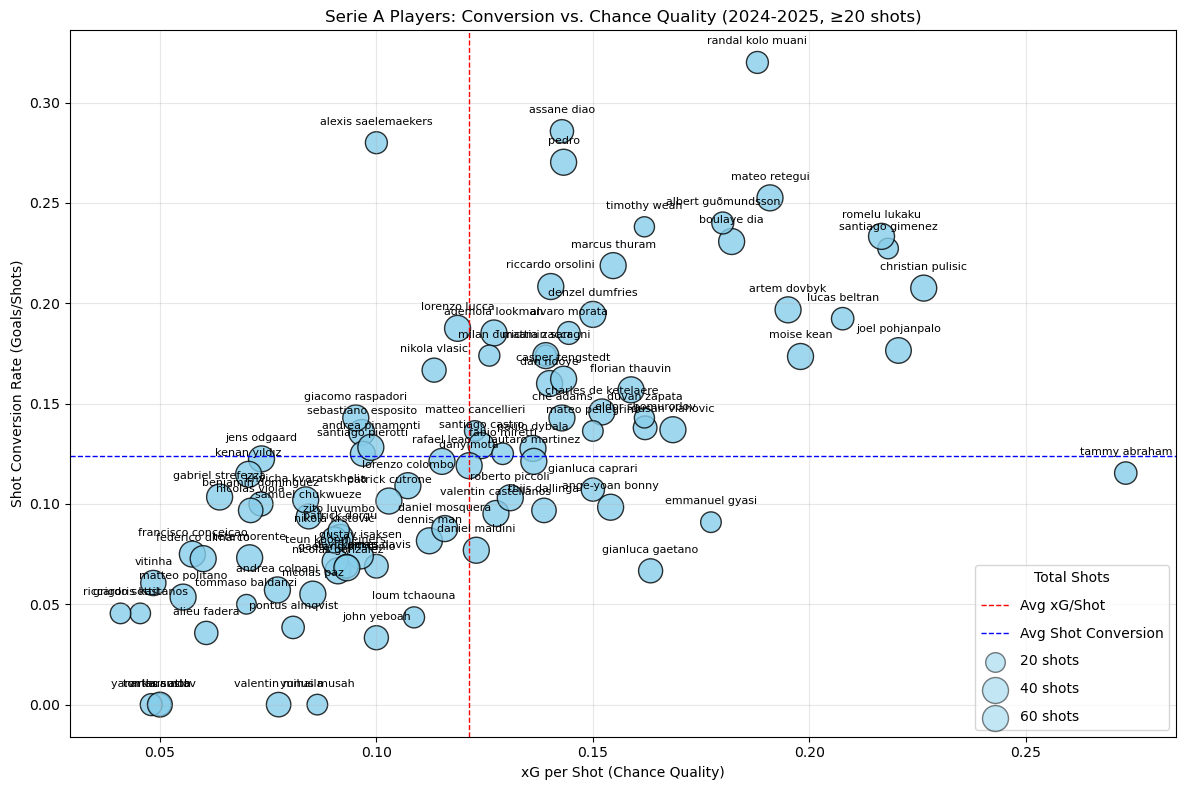

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Make sure your data pre-processing (xG, xG_per_shot, etc.) is done above this!

plt.figure(figsize=(12,8))

# Set bubble sizes with np.clip to keep them in a readable range
bubble_sizes = np.clip(attackers['Shots']*10, 30, 350)

sc = plt.scatter(
    attackers['xG_per_shot'],
    attackers['Shot_Conversion'],
    s=bubble_sizes,
    c='skyblue',   # or 'gray' if you prefer
    alpha=0.8,
    edgecolor='k'
)

# Annotate all players
for i, row in attackers.iterrows():
    plt.text(
        row['xG_per_shot'],
        row['Shot_Conversion'] + 0.008,
        row['Player'],
        fontsize=8,
        ha='center',
        va='bottom'
    )

plt.axvline(attackers['xG_per_shot'].mean(), color='red', linestyle='--', linewidth=1, label='Avg xG/Shot')
plt.axhline(attackers['Shot_Conversion'].mean(), color='blue', linestyle='--', linewidth=1, label='Avg Shot Conversion')

plt.xlabel('xG per Shot (Chance Quality)')
plt.ylabel('Shot Conversion Rate (Goals/Shots)')
plt.title('Serie A Players: Conversion vs. Chance Quality (2024-2025, ≥20 shots)')

plt.grid(alpha=0.3)
plt.tight_layout()

# --- Bubble size legend ---
for shots in [20, 40, 60]:
    plt.scatter([], [], s=np.clip(shots*10, 30, 350), c='skyblue', alpha=0.5, edgecolor='k', label=f'{shots} shots')

plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Total Shots', loc='lower right')

plt.show()


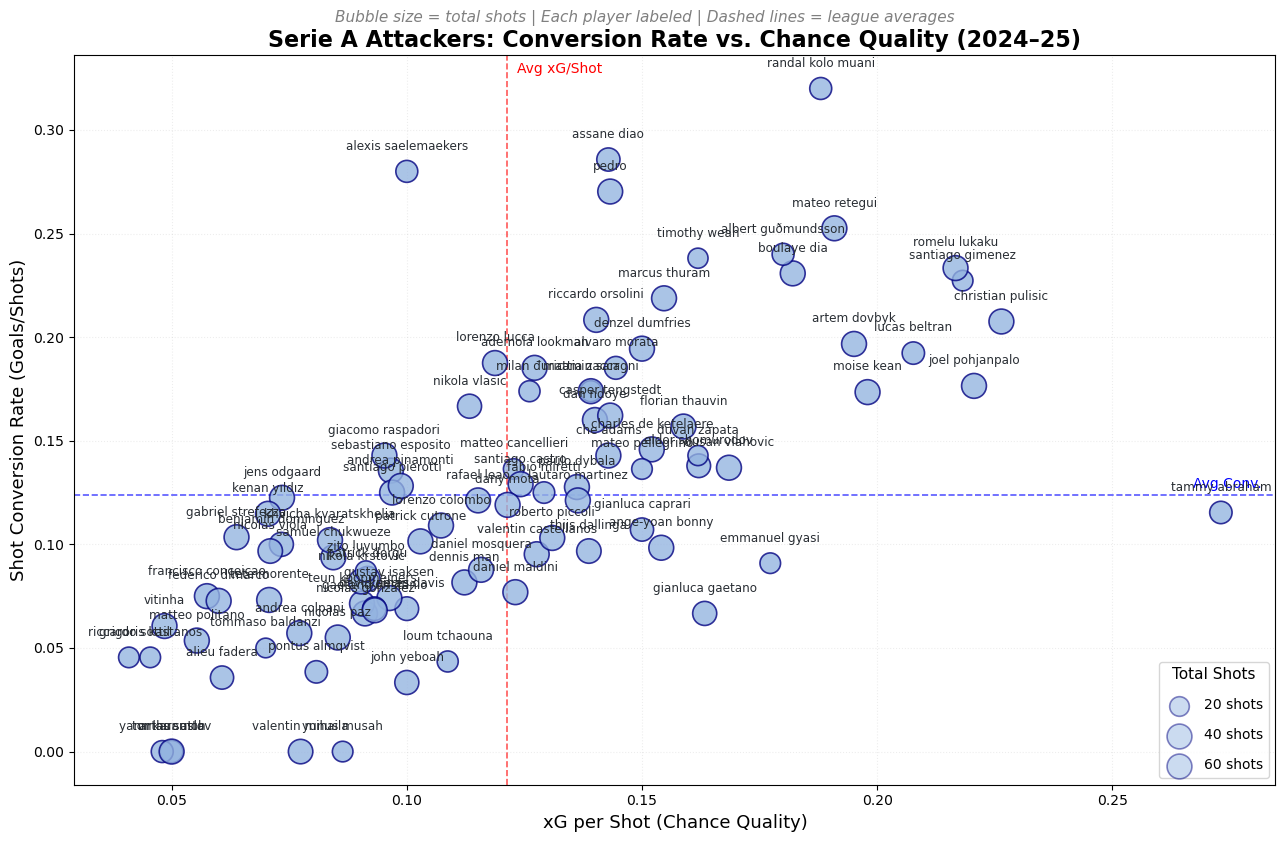

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13, 9))

# Bubble sizes: clamp min/max
bubble_sizes = np.clip(attackers['Shots']*10, 36, 320)

# Main scatter plot
sc = plt.scatter(
    attackers['xG_per_shot'],
    attackers['Shot_Conversion'],
    s=bubble_sizes,
    c='#94b4e0',  # a soft blue, or choose a custom one
    alpha=0.79,
    edgecolor='navy',
    linewidth=1.2,
    zorder=3
)

# Annotate all players
for i, row in attackers.iterrows():
    plt.text(
        row['xG_per_shot'],
        row['Shot_Conversion'] + 0.009,
        row['Player'],
        fontsize=8.6,
        ha='center',
        va='bottom',
        color='#24292f', # dark gray/black for clarity
        alpha=0.98,
        zorder=4
    )

# Dashed mean lines (with labels)
xbar = attackers['xG_per_shot'].mean()
ybar = attackers['Shot_Conversion'].mean()
plt.axvline(xbar, color='red', linestyle='--', linewidth=1.2, alpha=0.65, zorder=2)
plt.axhline(ybar, color='blue', linestyle='--', linewidth=1.2, alpha=0.65, zorder=2)
plt.text(xbar+0.002, plt.ylim()[1]*0.99, "Avg xG/Shot", color='red', fontsize=10, ha='left', va='top')
plt.text(plt.xlim()[1]*0.99, ybar+0.002, "Avg Conv.", color='blue', fontsize=10, ha='right', va='bottom')

# Axes, title, and subtitle
plt.xlabel('xG per Shot (Chance Quality)', fontsize=13)
plt.ylabel('Shot Conversion Rate (Goals/Shots)', fontsize=13)
plt.title('Serie A Attackers: Conversion Rate vs. Chance Quality (2024–25)', fontsize=16, fontweight='bold')
plt.suptitle('Bubble size = total shots | Each player labeled | Dashed lines = league averages', fontsize=11, color='gray', y=0.93, style='italic')

plt.grid(alpha=0.22, linestyle=':', zorder=0)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Leaves space for subtitle

# --- Bubble size legend (rounded markers, clean) ---
for shots in [20, 40, 60]:
    plt.scatter([], [], s=np.clip(shots*10, 36, 320), c='#94b4e0', alpha=0.48,
                edgecolor='navy', linewidth=1.2, label=f'{shots} shots', marker='o')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1.15, title='Total Shots', loc='lower right', fontsize=10, title_fontsize=11)

plt.show()


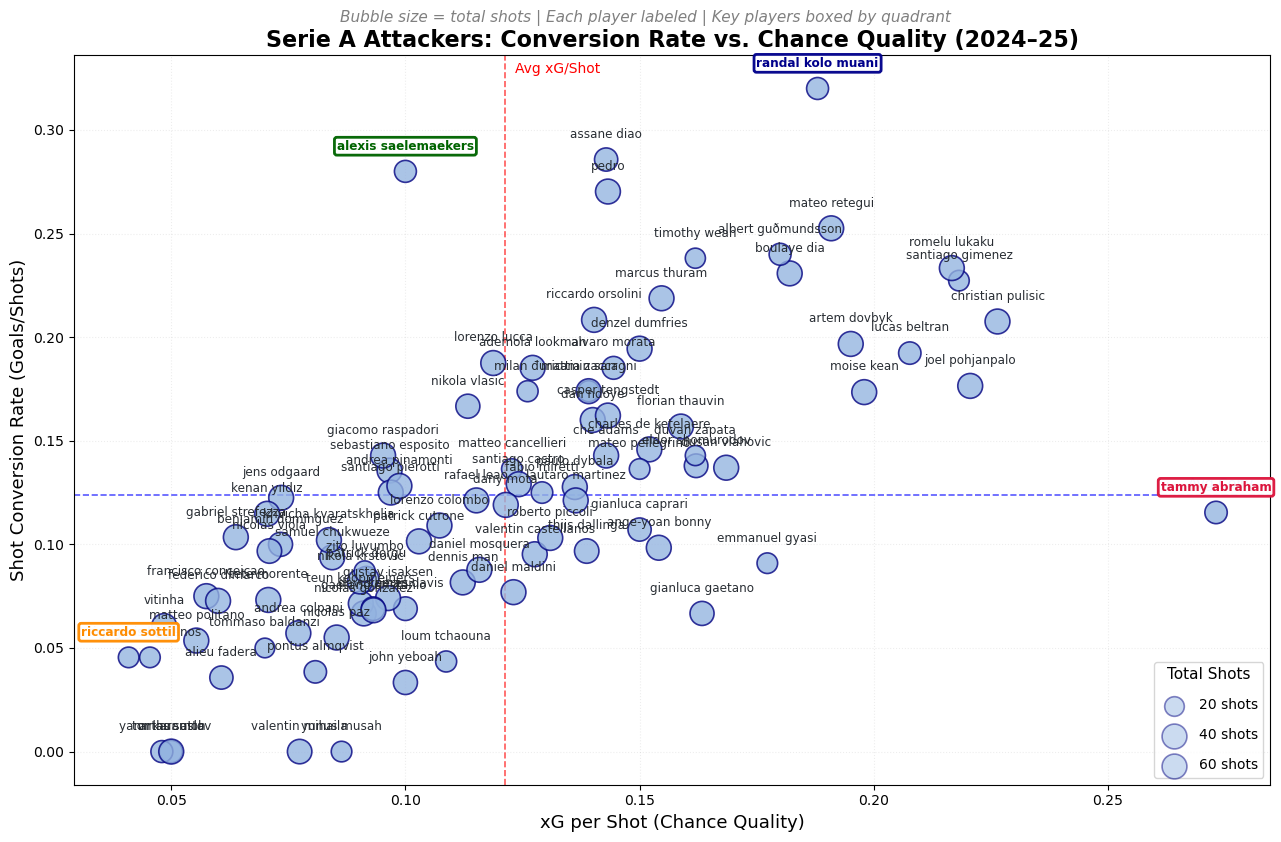

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13, 9))

bubble_sizes = np.clip(attackers['Shots']*10, 36, 320)

# Main scatter plot
plt.scatter(
    attackers['xG_per_shot'],
    attackers['Shot_Conversion'],
    s=bubble_sizes,
    c='#94b4e0',
    alpha=0.79,
    edgecolor='navy',
    linewidth=1.2,
    zorder=3
)

# Means for quadrants
xbar = attackers['xG_per_shot'].mean()
ybar = attackers['Shot_Conversion'].mean()

# --- (1) Annotate all players, default style
for i, row in attackers.iterrows():
    plt.text(
        row['xG_per_shot'],
        row['Shot_Conversion'] + 0.009,
        row['Player'],
        fontsize=8.6,
        ha='center',
        va='bottom',
        color='#24292f',
        alpha=0.98,
        zorder=4
    )

# --- (2) Overlay a color box *only* for the highlighted players (no double name)
# Example: Top clinical, poacher, waster, shooter
highlight = pd.concat([
    attackers[(attackers['xG_per_shot'] < xbar) & (attackers['Shot_Conversion'] > ybar)].sort_values('Shot_Conversion', ascending=False).head(1),  # Clinical
    attackers[(attackers['xG_per_shot'] > xbar) & (attackers['Shot_Conversion'] > ybar)].sort_values('Shot_Conversion', ascending=False).head(1),  # Poacher
    attackers[(attackers['xG_per_shot'] > xbar) & (attackers['Shot_Conversion'] < ybar)].sort_values('xG_per_shot', ascending=False).head(1),      # Wasters
    attackers[(attackers['xG_per_shot'] < xbar) & (attackers['Shot_Conversion'] < ybar)].sort_values('xG_per_shot').head(1)                        # Volume
])
quadrant_colors = ['darkgreen', 'darkblue', 'crimson', 'darkorange']

for (idx, row), color in zip(highlight.iterrows(), quadrant_colors):
    plt.text(
        row['xG_per_shot'],
        row['Shot_Conversion'] + 0.009,
        row['Player'],
        fontsize=8.7,
        ha='center',
        va='bottom',
        color=color,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.20", edgecolor=color, facecolor='white', lw=2, alpha=0.96),
        zorder=6
    )

# Dashed means and annotation
plt.axvline(xbar, color='red', linestyle='--', linewidth=1.2, alpha=0.65, zorder=2)
plt.axhline(ybar, color='blue', linestyle='--', linewidth=1.2, alpha=0.65, zorder=2)
plt.text(xbar+0.002, plt.ylim()[1]*0.99, "Avg xG/Shot", color='red', fontsize=10, ha='left', va='top')
plt.text(plt.xlim()[1]*0.99, ybar+0.002, "Avg Conv.", color='blue', fontsize=10, ha='right', va='bottom')

plt.xlabel('xG per Shot (Chance Quality)', fontsize=13)
plt.ylabel('Shot Conversion Rate (Goals/Shots)', fontsize=13)
plt.title('Serie A Attackers: Conversion Rate vs. Chance Quality (2024–25)', fontsize=16, fontweight='bold')
plt.suptitle('Bubble size = total shots | Each player labeled | Key players boxed by quadrant', fontsize=11, color='gray', y=0.93, style='italic')
plt.grid(alpha=0.22, linestyle=':', zorder=0)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Bubble size legend
for shots in [20, 40, 60]:
    plt.scatter([], [], s=np.clip(shots*10, 36, 320), c='#94b4e0', alpha=0.48,
                edgecolor='navy', linewidth=1.2, label=f'{shots} shots', marker='o')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1.15, title='Total Shots', loc='lower right', fontsize=10, title_fontsize=11)

plt.show()
